# Spotify Top 100 Songs of 2010-2019

Today we are using a big dataset about music! People say you can't live without music so do I, and also I've been recently learning data analysis with python https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas so I'm using different types of tools such as pandas, numpy and matplotlib to have a look on this dataset. Hope you enjoy it!

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

To download data set I'm using opendatasets in python and I got my url from https://www.kaggle.com/datasets?fileType=csv using the following codes!

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./spotify-top-100-songs-of-20152019" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './spotify-top-100-songs-of-20152019'

In [6]:
import os
os.listdir(data_dir)

['Spotify 2010 - 2019 Top 100 Songs.xlsx', 'Spotify 2010 - 2019 Top 100.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-course-project-hosein_mirhoseini" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini


'https://jovian.ai/hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini'

## Data Preparation and Cleaning

Let's load the CSV files using the Pandas library. We'll use the name spotify_raw_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.


> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
import pandas as pd

In [12]:
spotify_raw_df = pd.read_csv('spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100.csv')

In [13]:
spotify_raw_df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
len(spotify_raw_df.columns)

17

In [18]:
selected_cloumns = [
    #song_info
    'title',
    'top genre',
    'year released',
    'artist type',
    'artist',
    'bpm',
    'dB',
    'val',
    'dur',
    'nrgy'
]

In [19]:
spotify_df = spotify_raw_df[selected_cloumns].copy()

In [20]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
0,STARSTRUKK (feat. Katy Perry),dance pop,2009.0,Duo,3OH!3,140.0,-6.0,23.0,203.0,81.0
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
spotify_df.shape

(1003, 10)

In [22]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   top genre      1000 non-null   object 
 2   year released  1000 non-null   float64
 3   artist type    1000 non-null   object 
 4   artist         1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   dB             1000 non-null   float64
 7   val            1000 non-null   float64
 8   dur            1000 non-null   float64
 9   nrgy           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.5+ KB


In [23]:
spotify_df.describe()

,year released,bpm,dB,val,dur,nrgy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,-5.663000,50.901000,220.406000,69.502000
std,3.241359,26.238022,2.025224,21.563399,39.927677,15.961415
min,1975.000000,65.000000,-18.000000,4.000000,113.000000,6.000000
25%,2012.000000,100.000000,-7.000000,35.000000,197.000000,59.000000
50%,2014.000000,122.000000,-5.000000,50.500000,216.000000,71.000000
75%,2017.000000,134.000000,-4.000000,68.000000,237.000000,81.250000
max,2021.000000,206.000000,-1.000000,97.000000,688.000000,98.000000


In [24]:
spotify_df.drop(spotify_df[spotify_df['year released'] < 2010].index, inplace = True)
spotify_df.drop(spotify_df[spotify_df['year released'] > 2019].index, inplace = True)

In [25]:
spotify_df.describe()

,year released,bpm,dB,val,dur,nrgy
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,2014.509317,121.216356,-5.661491,50.865424,219.897516,69.477226
std,2.863640,26.231291,2.030929,21.520842,39.673288,16.024172
min,2010.000000,65.000000,-18.000000,4.000000,113.000000,6.000000
25%,2012.000000,100.000000,-7.000000,35.000000,197.000000,59.000000
50%,2014.500000,122.000000,-5.000000,51.000000,216.000000,72.000000
75%,2017.000000,134.000000,-4.000000,67.000000,236.000000,82.000000
max,2019.000000,206.000000,-1.000000,97.000000,688.000000,98.000000


In [26]:
spotify_df.shape

(969, 10)

In [27]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this part first we loaded data frame using pandas and then we select 10 important columns to make analysis easier.
Then we looked at the 'year released' column and considered that there are some songs out of the year range so we dropped them and now our data is clean to continue

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini


'https://jovian.ai/hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini'

## Exploratory Analysis and Visualization

Before we ask questions about the spotify data, it would help to understand data using charts for different columns. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Most popular genres

In [31]:
spotify_df['top genre'].nunique()

128

In [32]:
top_genres = spotify_df['top genre'].value_counts().head(15)
top_genres

dance pop               349
pop                      57
atl hip hop              39
art pop                  33
hip hop                  21
boy band                 20
canadian hip hop         18
edm                      17
folk-pop                 15
conscious hip hop        14
contemporary country     14
chicago rap              13
modern rock              13
canadian pop             13
barbadian pop            12
Name: top genre, dtype: int64

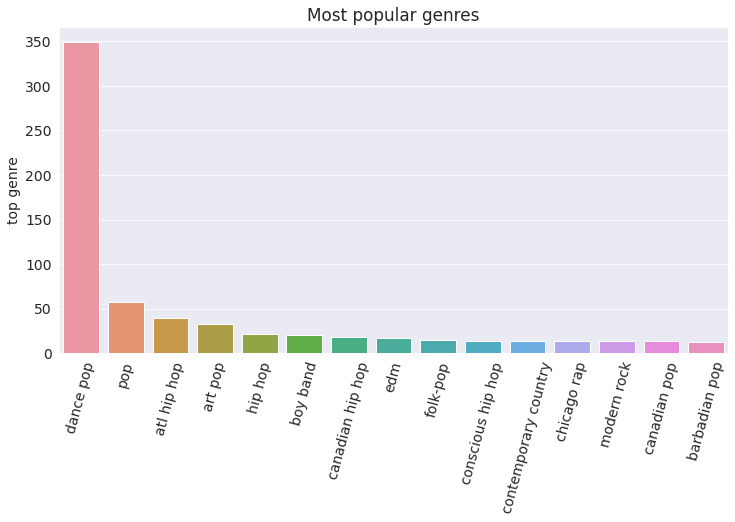

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Most popular genres")
sns.barplot(x=top_genres.index, y=top_genres);

Using a bar plot we were able to see that dance pop is by far the most popular genre among the genres. After that stands pop so we can realize that pop musics are really popular and maybe it is the reason that they are called pop!

Duration

we want to see what is the relation between duration of song and popularity!

In [34]:
import numpy as np

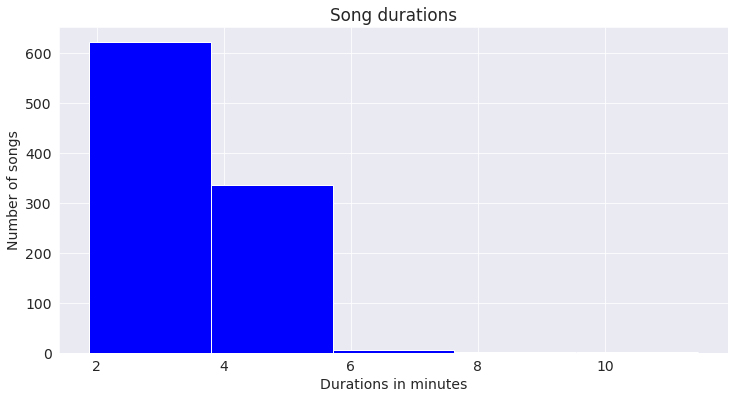

In [35]:
plt.figure(figsize=(12, 6))
plt.title("Song durations")
plt.xlabel('Durations in minutes')
plt.ylabel('Number of songs')

plt.hist(spotify_df['dur']/60, bins=5, color='blue');

Seeing this chart we can realize that songs between 2 - 4 minutes are mostly listened. Also we can realize that people don't like long musics! 

Artist type
we want to see what is the variety of songs based on artist type

In [36]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
type_count = spotify_df['artist type'].value_counts()
type_count

Solo          723
Band/Group    162
Duo            68
Trio           13
Name: artist type, dtype: int64

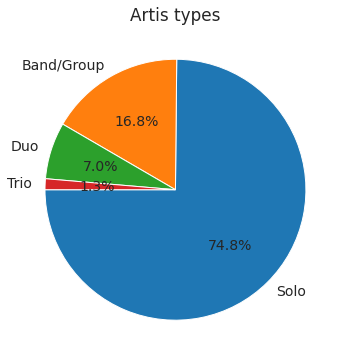

In [38]:
plt.figure(figsize=(12,6))
plt.title("Artis types")
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=180);

Only 1.3% of songs are Trios, so if your music band is made out of three people, It's bad news. However if you're singing alone, then I suggest that you keep working because 74.8% of songs are Solos. Also Bad/Groups are really popular todays and we can see that they are more popular than Duets or Trios!

**Artist** -
Top 5 artist with most songs!

In [39]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
artist_counts = spotify_df.artist.value_counts().head(5)
artist_counts

Taylor Swift     21
Calvin Harris    18
Drake            18
Ariana Grande    14
Bruno Mars       13
Name: artist, dtype: int64

<BarContainer object of 5 artists>

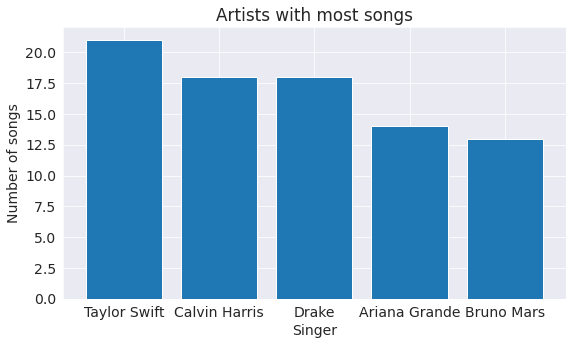

In [41]:
plt.title("Artists with most songs")
plt.xlabel('Singer')
plt.ylabel('Number of songs')
plt.bar(artist_counts.index, artist_counts)

As you can imagine Taylor Swift has the most songs! 

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini


'https://jovian.ai/hoseinmirhoseini64/zerotopandas-course-project-hosein-mirhoseini'

## Asking and Answering Questions

let's answer some questions.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Which band has the most songs?

In [44]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
spotify_df['artist type'].unique()

array(['Duo', 'Solo', 'Band/Group', 'Trio', nan], dtype=object)

In [46]:
bands = spotify_df[spotify_df['artist type'] == 'Band/Group']
bands

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
6,The Time (Dirty Bit),dance pop,2010.0,Band/Group,Black Eyed Peas,128.0,-8.0,44.0,308.0,81.0
10,Teach Me How to Dougie,pop rap,2011.0,Band/Group,Cali Swag District,85.0,-5.0,51.0,237.0,44.0
26,Like A G6,asian american hip hop,2010.0,Band/Group,Far East Movement,125.0,-8.0,78.0,217.0,84.0
54,Misery,pop,2010.0,Band/Group,Maroon 5,103.0,-5.0,73.0,216.0,81.0
58,Animal,modern alternative rock,2010.0,Band/Group,Neon Trees,148.0,-6.0,74.0,212.0,83.0
...,...,...,...,...,...,...,...,...,...,...
921,Boy With Luv (feat. Halsey),k-pop,2019.0,Band/Group,BTS,120.0,-5.0,80.0,230.0,86.0
941,Sucker,boy band,2019.0,Band/Group,Jonas Brothers,138.0,-5.0,95.0,181.0,73.0
942,Only Human,boy band,2019.0,Band/Group,Jonas Brothers,94.0,-6.0,87.0,183.0,50.0
965,Piece Of Your Heart,edm,2019.0,Band/Group,MEDUZA,124.0,-7.0,63.0,153.0,74.0


In [47]:
bands.artist.value_counts().head(1)

Maroon 5    11
Name: artist, dtype: int64

We can see the band Maroon 5 has the most songs! To see more about this band: https://www.maroon5.com/

#### Q2:  - What songs should you listen when you need energy!

In [48]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
energy_songs = spotify_df.sort_values('nrgy', ascending=False).head(10)

In [50]:
energy_songs.title

312                                 Get Up (Rattle)
88         Written in the Stars (feat. Eric Turner)
284                         Bangarang (feat. Sirah)
422                  Bad (feat. Vassy) - Radio Edit
254                                    BURN IT DOWN
116               Bounce (feat. Kelis) - Radio Edit
475                            Timber (feat. Ke$ha)
380                Don't Stop the Party (feat. TJR)
225                            Hot Right Now - Edit
230    Spectrum (Say My Name) - Calvin Harris Remix
Name: title, dtype: object

So here it is. I gave you a list of songs when you need energy! Go have fun (:

#### Q3:Which artists have the most loud musics?

So we have a value called dB which can help us to figure out how loud a song is! Let's take a look at

In [51]:
spotify_df.dB.describe()

count    966.000000
mean      -5.661491
std        2.030929
min      -18.000000
25%       -7.000000
50%       -5.000000
75%       -4.000000
max       -1.000000
Name: dB, dtype: float64

OK! The mean is -5.6 so any songs above that should be loud!

In [52]:
loud_musics = spotify_df[spotify_df.dB > -5.6]
loud_musics

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
8,Talking to the Moon,dance pop,2010.0,Solo,Bruno Mars,146.0,-5.0,8.0,218.0,59.0
9,Just the Way You Are,dance pop,2010.0,Solo,Bruno Mars,109.0,-5.0,42.0,221.0,84.0
...,...,...,...,...,...,...,...,...,...,...
987,Otro Trago,latin,2019.0,Solo,Sech,176.0,-5.0,62.0,226.0,70.0
989,If I Can't Have You,canadian pop,2019.0,Solo,Shawn Mendes,124.0,-4.0,86.0,191.0,81.0
990,Don’t Feel Like Crying,dance pop,2019.0,Solo,Sigrid,120.0,-4.0,72.0,157.0,81.0
995,SICKO MODE,hip hop,2018.0,Solo,Travis Scott,155.0,-4.0,45.0,313.0,73.0


In [53]:
loud_musics.artist.value_counts().head(10)

Calvin Harris    18
Bruno Mars       10
Kesha             8
Ariana Grande     8
Rihanna           8
David Guetta      7
Katy Perry        7
Marshmello        7
One Direction     6
Chris Brown       6
Name: artist, dtype: int64

Here it is. So if you like loud musics I recommend Calvin Harris and Bruno mars

#### Q4:What should you listen if you want to listen to positive mood songs from 2012?

So we have a value called 'val' which shows us how positive the mood of the song is

In [54]:
spotify_df

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
1,My First Kiss (feat. Ke$ha),dance pop,2010.0,Duo,3OH!3,138.0,-4.0,83.0,192.0,89.0
2,I Need A Dollar,pop soul,2010.0,Solo,Aloe Blacc,95.0,-7.0,96.0,243.0,48.0
3,Airplanes (feat. Hayley Williams of Paramore),atl hip hop,2010.0,Solo,B.o.B,93.0,-4.0,38.0,180.0,87.0
4,Nothin' on You (feat. Bruno Mars),atl hip hop,2010.0,Solo,B.o.B,104.0,-6.0,74.0,268.0,85.0
5,Magic (feat. Rivers Cuomo),atl hip hop,2010.0,Solo,B.o.B,82.0,-4.0,79.0,196.0,93.0
...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),afroswing,2019.0,Duo,Young T & Bugsey,138.0,-6.0,59.0,214.0,58.0
999,The London (feat. J. Cole & Travis Scott),atl hip hop,2019.0,Solo,Young Thug,98.0,-7.0,18.0,200.0,59.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
songs_2012 = spotify_df[spotify_df['year released'] == 2012.0]
songs_2012

,title,top genre,year released,artist type,artist,bpm,dB,val,dur,nrgy
39,California Gurls,dance pop,2012.0,Solo,Katy Perry,125.0,-4.0,43.0,235.0,75.0
116,Bounce (feat. Kelis) - Radio Edit,dance pop,2012.0,Solo,Calvin Harris,128.0,-2.0,76.0,222.0,96.0
129,Louder,dancefloor dnb,2012.0,Solo,DJ Fresh,140.0,-1.0,48.0,207.0,93.0
152,Last Friday Night (T.G.I.F.),dance pop,2012.0,Solo,Katy Perry,126.0,-4.0,77.0,231.0,82.0
154,E.T.,dance pop,2012.0,Solo,Katy Perry,152.0,-5.0,76.0,230.0,87.0
...,...,...,...,...,...,...,...,...,...,...
391,Ho Hey,folk-pop,2012.0,Band/Group,The Lumineers,80.0,-9.0,35.0,163.0,47.0
399,Clarity,complextro,2012.0,Solo,Zedd,128.0,-3.0,18.0,271.0,78.0
457,Classic,dance pop,2012.0,Duo,MKTO,102.0,-5.0,76.0,175.0,79.0
475,Timber (feat. Ke$ha),dance pop,2012.0,Solo,Pitbull,130.0,-4.0,79.0,204.0,96.0


In [56]:
pos_songs = songs_2012.sort_values('val').head(10)
pos_songs[['title', 'artist']]

,title,artist
270,Million Voices - Radio Edit,Otto Knows
200,Skyfall,Adele
266,Dirty Paws,Of Monsters and Men
252,Video Games,Lana Del Rey
399,Clarity,Zedd
283,Hands on the Wheel (feat. Asap Rocky),ScHoolboy Q
251,Ride,Lana Del Rey
232,Thinkin Bout You,Frank Ocean
248,m.A.A.d city,Kendrick Lamar
262,Madness,Muse


Wish you a positive mood from 2012

#### Q5: What is the average of song duration, positivity and bpm in each year?

In [58]:
new_data = spotify_df.groupby('year released')[['dur', 'bpm', 'val']].mean()
new_data

,dur,bpm,val
year released,,,
2010.0,221.968085,120.787234,58.808511
2011.0,231.010753,126.322581,52.774194
2012.0,227.825688,120.743119,55.733945
2013.0,234.965116,120.197674,50.569767
2014.0,222.099010,120.544554,50.504950
2015.0,219.939394,118.575758,46.010101
2016.0,221.290698,120.430233,48.244186
2017.0,216.818182,119.141414,46.808081
2018.0,210.392857,119.714286,46.669643


So it's nice. we can see that 2015 was not a good year for people who like energetic musics, because it has the least amount of "val" and "bpm" in the table. Also if you like to listen to some energetic musics you can choose songs from 2011 and 2019 (:

Let us save and upload our work to Jovian before continuing.

In [59]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

So we started with a raw data frame and then we ended up having 10 columns. We looked at the columns graphically and also answered some interesting questions, Like what band has the most songs!
Using this data set we were able to see that people like pop dance a lot and also Taylor Swift rocks!
Music and programming are Inseparable! either when you are coding or doing a data analysis.

In [ ]:
import jovian

In [ ]:
jovian.commit()

In [ ]:
import jovian

In [ ]:
jovian.commit()